# Pytesseract

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,261 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

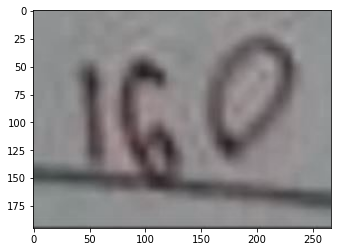

In [2]:
import cv2 
import pytesseract
import matplotlib.pyplot as plt
import re

IMG_PATH = 'cropped_160.JPG'
img = cv2.imread(IMG_PATH)

plt.imshow(img)

Original: GO

Processed: 60


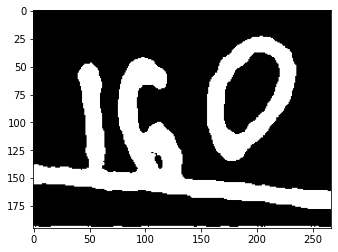

In [3]:

replace_table = {
    'A': '4', 'a': '0',
    'B': '8', 'b': '6',
    'C': '6', 'c': '6',
    'D': '0', 'd': '',
    'E': '8', 'e': '',
    'F': '', 'f': '',
    'G': '6', 'g': '9',
    'H': '', 'h': '',
    'I': '1', 'i': '1',
    'J': '', 'j': '',
    'K': '', 'k': '',
    'L': '1', 'l': '1',
    'M': '', 'm': '',
    'N': '', 'n': '',
    'O': '0', 'o': '0',
    'P': '', 'p': '',
    'Q': '2', 'q': '9',
    'R': '', 'r': '',
    'S': '5', 's': '5',
    'T': '', 't': '',
    'U': '', 'u': '',
    'V': '', 'v': '',
    'W': '', 'w': '',
    'X': '', 'x': '',
    'Y': '4', 'y': '4',
    'Z': '2', 'z': '2'
}

def image_to_text(img, only_digits=False):
  # config: https://ai-facets.org/tesseract-ocr-best-practices/
  text = pytesseract.image_to_string(img, config=custom_config)
  print("Original: {}".format(text))

  text = re.sub('[\W]', '', text)
  text = text.strip()

  if only_digits:
    text = replace_text(text)
  return text

def replace_text(text):
  # text = text.upper()
  for r in replace_table:
    text = text.replace(r, replace_table[r])
  return text

custom_config = r'--psm 6 --oem 3'

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.threshold(src=gray, thresh=0, maxval=255, type=cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]
plt.imshow(thr, cmap='gray')

processed = image_to_text(img, only_digits=True)
print("Processed: {}".format(processed))

# EasyOCR

In [4]:
!pip install easyocr

     |████████████████████████████████| 62.4MB 64kB/s 


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
import easyocr
reader = easyocr.Reader(['en'])

bounds = reader.readtext(thr, detail=0) #detail=0 argument will only give text in array
original = bounds[0]
print("Original: {}".format(original))

processed = replace_text(bounds[0])
print("Processed: {}".format(processed))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Original: JO
Processed: 0
